# Face Detection, Emotion Recognition, and Age Prediction App
## FaceNet-PyTorch && DeepFace

In [1]:
import numpy as np
import cv2
import torch
from deepface import DeepFace
from matplotlib import pyplot as plt

In [2]:
class FaceApp:
    """
    Face APP
    """

    def __init__(self, detection_model) -> None:
        self.detection_model = detection_model

    def read_image(self, img_path):
        """
        Read the image
        """
        image = cv2.imread(img_path)
        return image

    def detect_faces(self, image):
        """
        Detect faces
        """
        try:
            faces = DeepFace.extract_faces(image, detector_backend = self.detection_model)
            return faces
        except Exception:
            print("Face could not be detected. Please confirm that the picture is a face photo")
            return None

    def detect_emotion_and_age(self, faces, image):
        """
        Detect emotion and age
        """

        data = {}
        # If no faces are detected
        if faces is None or len(faces) == 0:
            print("No faces detected in the image.")
            return data
        # If faces are detected
        else:
            # Specify age, gender, emotion, race
            analysis = DeepFace.analyze(image,
                                        actions = ("age", "gender", "emotion", "race"),
                                        detector_backend = self.detection_model)[0]
            print("analysis", analysis)

            data["image"] = image
            data["emotions"] = analysis["dominant_emotion"]
            data["age"] = analysis["age"]
            data["gender"] = analysis["dominant_gender"]
            data["race"] = analysis["dominant_race"]
        return data

    def clasify_face(self, img_path):
        image = self.read_image(img_path)
        faces = self.detect_faces(image)
        results = self.detect_emotion_and_age(faces, image)
        return results, image

In [3]:
detection_models = ['opencv', 'retinaface', 'mtcnn', 'ssd', 'dlib', 'mediapipe', 'yolov8']
faceapp = FaceApp(detection_models[0])

Action: race: 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]   


analysis {'age': 25, 'region': {'x': 170, 'y': 57, 'w': 121, 'h': 121}, 'gender': {'Woman': 99.95624423027039, 'Man': 0.043752597412094474}, 'dominant_gender': 'Woman', 'emotion': {'angry': 0.002829041659424547, 'disgust': 1.0521247872929962e-05, 'fear': 1.108349021524191, 'happy': 7.706003657403926e-05, 'sad': 0.05672800471074879, 'surprise': 98.83191585540771, 'neutral': 9.448024229641305e-05}, 'dominant_emotion': 'surprise', 'race': {'asian': 0.2848480066566471, 'indian': 0.35490246742382453, 'black': 0.0049775116405782706, 'white': 67.35883756630645, 'middle eastern': 22.880583875214093, 'latino hispanic': 9.115853703966957}, 'dominant_race': 'white'}


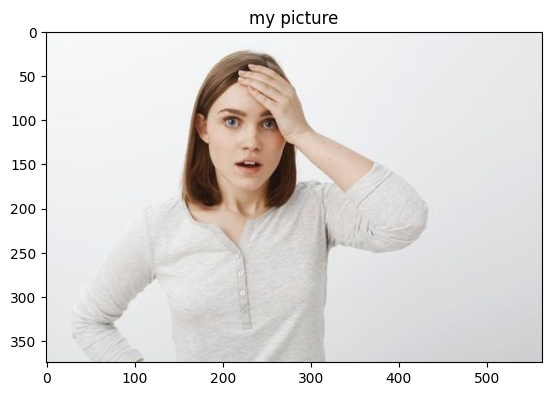

Emotion: surprise
Age: 25
Gender: Woman
Race: white


In [50]:
img_path = "../data/angry.jpg"
# img_path = "../data/disgust.jpg"
# img_path = "../data/fear.jpg"
# img_path = "../data/happy.jpg"
# img_path = "../data/neutral.jpg"
# img_path = "../data/sad.jpg"
# img_path = "../data/surprise.jpg"
result, image = faceapp.clasify_face(img_path)
if result:
    # Display the result
    RGB_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_im)
    plt.title('my picture')
    plt.show()
    print("Emotion:", result['emotions'])
    print("Age:", result['age'])
    print("Gender:", result['gender'])
    print("Race:", result['race'])

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]   


analysis {'age': 28, 'region': {'x': 243, 'y': 180, 'w': 653, 'h': 653}, 'gender': {'Woman': 98.30222725868225, 'Man': 1.6977723687887192}, 'dominant_gender': 'Woman', 'emotion': {'angry': 7.277549058198929, 'disgust': 0.0055260490626096725, 'fear': 32.566994428634644, 'happy': 0.5712162237614393, 'sad': 28.916534781455994, 'surprise': 8.919857442378998, 'neutral': 21.74231857061386}, 'dominant_emotion': 'fear', 'race': {'asian': 2.0699137216909262, 'indian': 11.164289127076968, 'black': 0.6554149706912076, 'white': 13.849009412645172, 'middle eastern': 44.48670512596308, 'latino hispanic': 27.77466442887015}, 'dominant_race': 'middle eastern'}


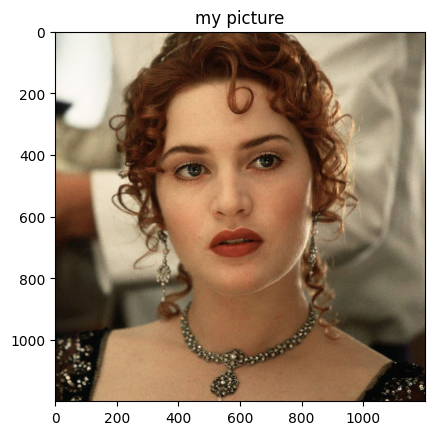

Emotion: fear
Age: 28
Gender: Woman
Race: middle eastern


In [4]:
img_path = "../newdata/kate-winslet.jpg"
result, image = faceapp.clasify_face(img_path)
if result:
    # Display the result
    RGB_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_im)
    plt.title('my picture')
    plt.show()
    print("Emotion:", result['emotions'])
    print("Age:", result['age'])
    print("Gender:", result['gender'])
    print("Race:", result['race'])